In [24]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [25]:
# Load data dan latih model
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="newton-cholesky", random_state=0, max_iter=10000)
clf.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'newton-cholesky'
,max_iter,10000
,multi_class,'deprecated'


In [26]:
# Probabilitas dari kelas positif
score = clf.predict_proba(X)[:, 1]
# Probabilitas bahwa pasien termasuk kelas 1 (ganas)

In [27]:
# Tampilan grafik
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,9)

In [28]:
# false positive rate dan true positive rate
FPR = []
TPR = []

In [29]:
# Tentukan threshold
# Thresholds = nilai ambang untuk menentukan apakah probabilitas diprediksi sebagai 1 atau 0
thresholds = np.arange(0.0, 1.0001, 0.001)

In [30]:
# Hitung jumlah positif dan negatif
# P = jumlah pasien yang terdeteksi sebagai kanker ganas
# N = jumlah pasien yang terdeteksi sebagai kanker jinak
P = sum(y)
N = len(y) - P

In [31]:
# Hitung TPR dan FPR untuk tiap threshold
for thresh in thresholds:
    TP = FP = 0
    for i in range(len(score)):
        if score[i] >= thresh:
            if y[i] == 1:
                TP += 1
            else:
                FP += 1
    FPR.append(FP / N)
    TPR.append(TP / P)

In [32]:
# Hitung AUC secara manual (Nilai Area Under Curve)
auc = -1 * np.trapezoid(TPR, FPR)
print("AUC manual:", round(auc, 4))

AUC manual: 0.9947


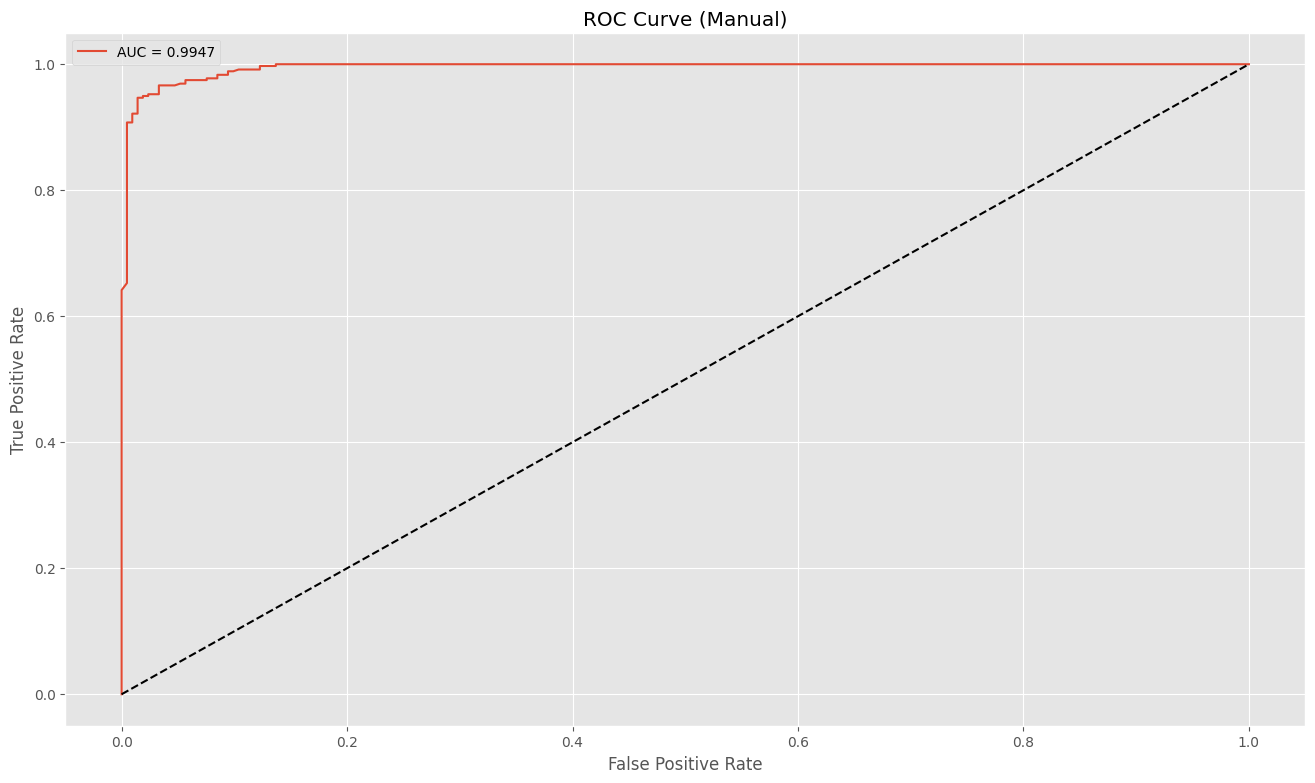

In [33]:
# Plot ROC Curve
plt.plot(FPR, TPR, label=f'AUC = {round(auc, 4)}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Manual)')
plt.legend()
plt.grid(True)
plt.show()